In [2]:
names = open("names.txt", "r").read().splitlines()

In [103]:
unique_chars = sorted(list(set("".join(names))))
unique_chars.insert(0,'.')
stoi = {v:i for i,v in enumerate(unique_chars)}
itos = {v:i for i,v in stoi.items()}
print(stoi)

{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [104]:
b = {}
for name in names:
    pname = ['.'] + list(name) + ['.']
    for first,second in zip(pname, pname[1:]):
        bigram = (first, second)
        b[bigram] = b.get(bigram, 0) + 1

In [105]:
sorted(b.items(), key=lambda key: -key[1])

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [106]:
import torch
n_c = len(unique_chars)
N = torch.zeros((n_c,n_c), requires_grad=False, dtype=torch.int32)

In [107]:
for key, val in b.items():
    f, s = key
    f_i, s_i = stoi[f], stoi[s]
    N[f_i, s_i] = val

(-0.5, 26.5, 26.5, -0.5)

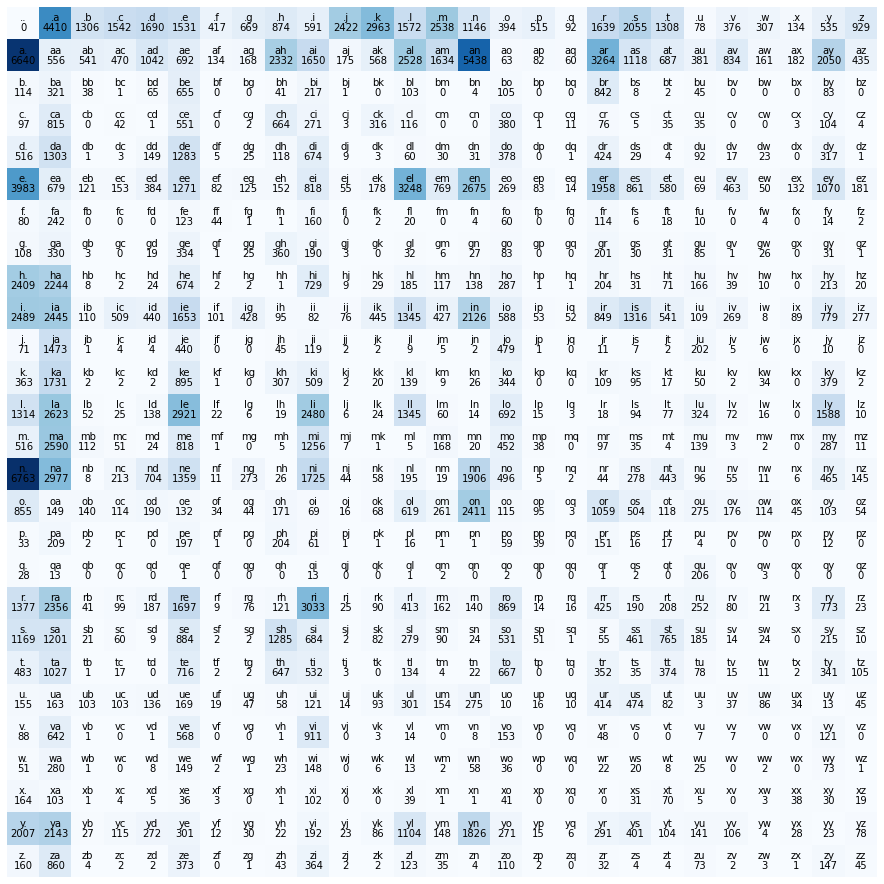

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot()
im = ax.imshow(N, 'Blues')
for i in range(n_c):
    for j in range(n_c):
        ax.text(j, i, itos[i]+itos[j], color='black', ha='center', va='bottom')
        ax.text(j, i, N[i,j].item(), color='black', ha='center', va='top')
ax.axis('off')